In [48]:
from numpy.testing import assert_, assert_equal, assert_almost_equal, assert_allclose, assert_approx_equal, assert_raises, assert_allclose
import numpy as np #import numpy as usual
# from numpy import linalg as LA #import linear algebra package for norms, etc.
import matplotlib.pyplot as plt #import plotting package

##### ME 574 Spring 2021

# Homework 2

1. the goal of this problem is to implement a Newton's method root solver and explore how the results depend on the choice of initial estimate of the root location.

a) Start by defining python functions `f` and `df` corresponding to $f(x) = -0.2 x + tan(x)$ and its derivative.

In [49]:
# Write python definitions for `f` and `df`
# YOUR CODE HERE
def f(x):
    return(-0.2*x + np.tan(x))
def df(x):
    return -0.2 + 1/(np.cos(x)**2)

In [50]:
assert_approx_equal(f(np.pi), -0.6283, significant=3)
assert_approx_equal(df(np.pi), 0.8, significant=3)

b) Implement the function `newton_step` that computes the next iteration in Newton's method for root-finding.

In [51]:
# insert your python implementation based on the docstring below
def newton_step(x):
    """
    Compute one iteration of a Newton's method to find a root of a function
    
    Arguments:
        x: float current estimate/guess of root location
        
    Returns:
        x_new: float new estimate of root location
    """
    # YOUR CODE HERE
    x0 = x
    x_new = x0 - f(x)/df(x)
    return x_new

In [52]:
assert_approx_equal(newton_step(0.5), 0.0937, significant=3)

c) Implement the function `newton_root` that executes iterations of `newton_step` to locate a root.

In [53]:
def newton_root(x0, tol, max_iters):
    """
    Compute a root of a function using Newton's method
    
    Arguments:
        x0: float initial guess of root location
        tol: float tolerance for absolute value of f at approximate root
        max_iters: int maximum number of Newton rootfinding steps
        
    Returns:
        x: float estimate of root location
    """
    # YOUR CODE HERE
    x = x0
    for i in range(max_iters):
        x = newton_step(x)
        if np.abs(x) < tol:
            return x
    return x

In [57]:
#Printing the answer
x0 = 4
tol = 1e-3
max_iters = 8
answer = newton_root(x0, tol, max_iters)
print(answer)

3.7902223782925293


In [58]:
x0 = 0.25
tol = 1e-3
max_iters = 8
assert_almost_equal(newton_root(x0, tol, max_iters), 0.000, decimal=3)
x0 = 4.
assert_approx_equal(newton_root(x0, tol, max_iters), 3.790, significant=3)

d) Implement the function `newton_root_array` that computes an array of Newton's method root estimates obtained from each entry in an array of initial guesses for the root location; then execute the cell below to test your implementation.

In [59]:
def newton_root_array(x0, tol, max_iters):
    """
    Compute an array of estimates for the roots of a function using Newton's method
    
    Arguments:
        x0: numpy array of float initial guesses of root location
        tol: float tolerance for absolute value of f at approximate root
        max_iters: int maximum number of Newton rootfinding steps
        
    Returns:
        x: numpy array of float estimates of root location
    """
    # YOUR CODE HERE
    x = np.zeros(len(x0))
    for i in range(len(x0)):
      x[i] = newton_root(x0[i], tol, max_iters)
    return x

In [60]:
n = 6
k = 2
xmin = 0.
xmax = k*np.pi
x0 = np.linspace(xmin, xmax, n)
tol = 1e-3
max_iters = 8
desired = np.array([0.00000000e+00, 3.37189058e-09, 3.79024555e+00, 3.79057573e+00,
       7.25024857e+00, 7.85398163e+00])
assert_allclose(newton_root_array(x0, tol, max_iters), desired, atol=4)


e) Now that your code is working and tested, the time has come for a larger computation and visualization. Execute the code below to plot the function $f(x)$, the computed root for each initial guess, and the $45^\circ$ line corresponding to $y=x$. 

Here is a suggestion for interpreting the plot:
Find an actual root of $f(x)$ where the green curve meets the horizontal axis.
Go straight up to the blue $45^\circ$ line to find the corresponding value on the vertical axis.
Compare the actual root location with a computed root location (indicated by a black +).

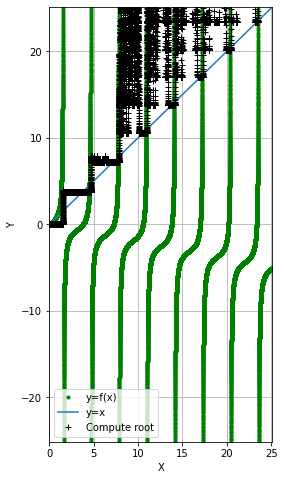

In [61]:
n = 1 << 16
k = 8
xmin, xmax = 0, k*np.pi
ymin, ymax = -k*np.pi, k*np.pi
tol = 1e-3
max_iters = 8
x0 = np.linspace(xmin, xmax, n)
root = newton_root_array(x0, tol, max_iters)
fig= plt.figure(figsize=(4,8))
plt.axis([xmin,xmax, ymin, ymax])
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x0, -0.2*x0+np.tan(x0), 'g.', label='y=f(x)')
plt.plot(x0, 1.0*x0, label='y=x')
plt.plot(x0, root, 'k+', label='Compute root')
plt.legend()
plt.grid()
assert_approx_equal(root[1 << 14], 7.854, significant=3)

f) Select the conclusion that is best supported by your plot.

In [62]:
# uncomment a line below and evaluate to make your selection
answer = ''
# answer = "Newton's method always converges to a value close to a root of the function f(x)."
# answer = "Newton's method always converges to the value of the root of the function f(x) closest to the initial guess."
answer = "For each root, there is an interval of initial guesses for which Newton's method converges to the closest root."
# YOUR CODE HERE

In [63]:
assert_(answer != '')

g) The cell below repeats the essential code to compute roots for an array of initial guesses.

In [64]:
n = 1 << 16
k = 8
xmin = 0.
xmax = k*np.pi
x0 = np.linspace(xmin, xmax, n, dtype=np.float64)
tol = 1e-3
max_iters = 8
root = newton_root_array(x0, tol, max_iters)

Copy the code from the cell above, paste it into the cell below, modify it to measure the execution time, and assign your timing (in ms) to a variable named `serial_elapsed`.

In [65]:
# YOUR CODE HERE
import time
from numba import cuda
t0 = time.time()
n = 1 << 16
k = 8
xmin = 0.
xmax = k*np.pi
x0 = np.linspace(xmin, xmax, n, dtype=np.float64)
tol = 1e-3
max_iters = 8
root = newton_root_array(x0, tol, max_iters)
t1 = time.time()
serial_elapsed = t1 - t0
print("serial elapsed time in ms:", serial_elapsed)

serial elapsed time in ms: 2.8012123107910156


In [47]:
print("Serial elapsed time in ms: ", serial_elapsed)
assert_(serial_elapsed != None)

Serial elapsed time in ms:  2.8065688610076904


2. The goal of this problem is to create parallelized code for computing the array of Newton's method root estimates. Your implementation should include a function `parallel_newton_root_array` that calls a kernel function `newton_kernel` that calls a device function version of `newton_root`.

In [67]:
#The existing code for `newton_kernel` is below. Make appropriate adjustments to make it work as a device function.
# YOUR CODE HERE
import math
from numba import jit, cuda, float32
PI = np.pi

@cuda.jit(device = True)
def newton_root(x0, tol, max_iters):
    """
    Compute a root of a function using Newton's method
    
    Arguments:
        x0: float initial guess of root location
        tol: float tolerance for absolute value of f at approximate root
        max_iters: int maximum number of Newton rootfinding steps
        
    Returns:
        x: float estimate of root location
    """
    # YOUR CODE HERE
    x = x0
    for i in range(max_iters):
        x = x - f(x)/df(x)
        if abs(x) < tol:
            return x
    return x
@cuda.jit(device = True)
def f(x):
    return -0.2*x + math.tan(x) 

@cuda.jit(device = True)
def df(x):
    return -0.2 + 1./(math.cos(x)**2)

# write the kernel function `newton_kernel`
# YOUR CODE HERE
@cuda.jit
def newton_kernel(d_root, d_x):
  i = cuda.grid(1)
  n = d_x.shape[0]
  block = cuda.blockIdx.x
  if cuda.threadIdx.x == 1:
    print("Block #:", block)
  if i < n:
    d_root[i] = newton_root(d_x[i], tol, max_iters)

# write the function `parallel_newton_root_array`
def parallel_newton_root_array(x0, tol, max_iters):
    """
    Compute an array of estimates for the roots of a function using Newton's method
    
    Arguments:
        x0: numpy array of float initial guesses of root location
        tol: float tolerance for absolute value of f at approximate root
        max_iters: int maximum number of Newton rootfinding steps
        
    Returns:
        d_root: numpy array of float estimates of root location (return device array copied to host array)
    """
    # YOUR CODE HERE
    n = x0.shape[0]
    d_x = cuda.to_device(x0)
    d_root = cuda.device_array(n, dtype = np.float32)
    gridDims = (n+k-1)//k
    newton_kernel[gridDims, k](d_root, d_x)
    return d_root.copy_to_host()

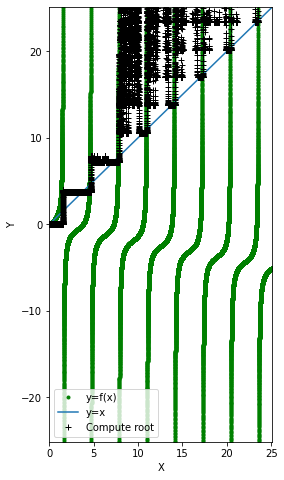

In [68]:
n = 1 << 16
k = 8
xmin, xmax = 0, k*np.pi
ymin, ymax = -k*np.pi, k*np.pi
tol = 1e-3
max_iters = 8
x0 = np.linspace(xmin, xmax, n)
parallel_root = parallel_newton_root_array(x0, tol, max_iters)
fig= plt.figure(figsize=(4,8))
plt.axis([xmin,xmax, ymin, ymax])
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x0, -0.2*x0+np.tan(x0), 'g.', label='y=f(x)')
plt.plot(x0, 1.0*x0, label='y=x')
plt.plot(x0, parallel_root, 'k+', label='Compute root')
plt.legend()
assert_approx_equal(parallel_root[1 << 14], 7.854, significant=3)
assert_allclose(parallel_root, root, atol=1e-2)

Does the plot of your parallel results match up reasonably well with the plot of the serial results?

In [69]:
answer = True
# assign answer to be True or False
# YOUR CODE HERE
print(answer)

True


In [70]:
assert_(answer != None)

Does the plot of the parallel results support the same conclusion reached from the plot of the serial results above?

In [71]:
answer = True
# assign answer to be True or False
# YOUR CODE HERE
print(answer)

True


In [72]:
assert_(answer != None)

Does the `parallel_root` array match up with the `root` array? Propose an explanation for any differences you observe.

In [73]:
# YOUR CODE HERE
answer = 'Yes, it does. I could not see any observable differences between the two arrays.'
print(answer)

Yes, it does. I could not see any observable differences between the two arrays.


3. Modify your parallel implementation to return both the `parallel_root` array and the time required for kernel execution using CUDA events. Also, have one thread in each block print the block number.

In [77]:
# insert modified code with CUDA event timing here

def parallel_newton_root_array(x0, tol, max_iters):
    """
    Compute an array of estimates for the roots of a function using Newton's method
    
    Arguments:
        x0: numpy array of float initial guesses of root location
        tol: float tolerance for absolute value of f at approximate root
        max_iters: int maximum number of Newton rootfinding steps
        
    Returns:
        d_root: numpy array of float estimates of root location (return device array copied to host array)
    """
    # YOUR CODE HERE
    from time import time
    n = x0.shape[0]
    d_x = cuda.to_device(x0)
    d_root = cuda.device_array(n, dtype = np.float32)
    TPB = 32
    blockDims = TPB
    gridDims = (n+TPB-1)//TPB
    e_start = cuda.event()
    e_end = cuda.event()
    start = time()
    e_start.record()
    newton_kernel[gridDims, blockDims](d_root, d_x)
    end = time()
    e_end.record()
    e_end.synchronize()
    kernel_duration = cuda.event_elapsed_time(e_start, e_end)
    elapsed_time = end -  start
    print("--- Kernel time(): %3.4f milliseconds ---" % (1000*elapsed_time))
    print("--- Kernel event: %3.4f milliseconds ---" % (kernel_duration))
    return d_root.copy_to_host(), kernel_duration
    return d_root.copy_to_host(), kernel_duration

Execute your timed, parallel code, assign the kernel execution time (in ms) to the variable `parallel_elapsed`. The cell below assigns to the variable `speedup` the ratio of serial to parallel timings.

In [78]:
parallel_root, parallel_elapsed = parallel_newton_root_array(x0, tol, max_iters)
speedup = serial_elapsed/parallel_elapsed

--- Kernel time(): 0.6363 milliseconds ---
--- Kernel event: 5.9558 milliseconds ---


Execute your modified parallel code several time. Do the blocks execute in the same order? Answer YES or NO and briefly explain how you determined your answer.

In [79]:
# YOUR CODE HERE
answer = 'No, they do not. I put a print statement before an if statement (in question 2) so that it prints only one thread per block, then I viewed the runtime logs'
print(answer)

No, they do not. I put a print statement before an if statement (in question 2) so that it prints only one thread per block, then I viewed the runtime logs
